In [2]:
#Importing required libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from scipy.interpolate import griddata
#import joblib
import pickle


import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Function to map x,y,z 
def plot_contour(x,y,z,resolution = 500,contour_method='linear'):
    resolution = str(resolution)+'j'
    X,Y = np.mgrid[min(x):max(x):complex(resolution),   min(y):max(y):complex(resolution)]
    points = [[a,b] for a,b in zip(x,y)]
    Z = griddata(points, z, (X, Y), method=contour_method)
    return X,Y,Z

In [4]:
#For design1 and 2 - Single contour as there are no slots in between
#For design 2 and 3 - Contain 4 solts. So 4 predicted pressure contours will be displayed

def plot(design):

    if design=="Design2" or design=="Design3" :
        node_list1=cordinates1["Node_Number"]
        node_list2=cordinates2["Node_Number"]
        node_list3=cordinates3["Node_Number"]
        node_list4=cordinates4["Node_Number"]

        results_1=results_df[results_df["Node_number"].isin(node_list1) ]
        results_2=results_df[results_df["Node_number"].isin(node_list2) ]
        results_3=results_df[results_df["Node_number"].isin(node_list3) ]
        results_4=results_df[results_df["Node_number"].isin(node_list4) ]

        x1 = results_1["X_cord"]
        y1 = results_1["Y_Cord"]
        z1 = results_1["Pressure"]

        x2 = results_2["X_cord"]
        y2 = results_2["Y_Cord"]
        z2 = results_2["Pressure"]

        x3 = results_3["X_cord"]
        y3 = results_3["Y_Cord"]
        z3 = results_3["Pressure"]

        x4 = results_4["X_cord"]
        y4 = results_4["Y_Cord"]
        z4 = results_4["Pressure"]

        X1,Y1,Z1 = plot_contour(x1,y1,z1,resolution = 500,contour_method='linear')
        X2,Y2,Z2 = plot_contour(x2,y2,z2,resolution = 500,contour_method='linear')
        X3,Y3,Z3 = plot_contour(x3,y3,z3,resolution = 500,contour_method='linear')
        X4,Y4,Z4 = plot_contour(x4,y4,z4,resolution = 500,contour_method='linear')

        with plt.style.context("classic"):

            fig1, ax1 = plt.subplots(figsize=(5,5))
            plt.colorbar(ax1.contourf(X1,Y1,Z1),shrink=0.7)
            ax1.xaxis.set_visible(False)
            ax1.yaxis.set_visible(False)

            fig1, ax2 = plt.subplots(figsize=(5,5))
            plt.colorbar(ax2.contourf(X2,Y2,Z2),shrink=0.7)
            ax2.xaxis.set_visible(False)
            ax2.yaxis.set_visible(False)  

            fig1, ax3 = plt.subplots(figsize=(5,5))
            plt.colorbar(ax3.contourf(X3,Y3,Z3),shrink=0.7)
            ax3.xaxis.set_visible(False)
            ax3.yaxis.set_visible(False)   

            fig1, ax4 = plt.subplots(figsize=(5,5))
            plt.colorbar(ax4.contourf(X4,Y4,Z4),shrink=0.7)
            ax4.xaxis.set_visible(False)
            ax4.yaxis.set_visible(False)   


    elif design=="Design1" or design=="Design4":
        X,Y,Z = plot_contour(x,y,z,resolution = 500,contour_method='linear')
        with plt.style.context("classic"):
            fig, ax = plt.subplots(figsize=(13,5))
            plt.colorbar(ax.contourf(X,Y,Z),shrink=0.7)
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)

    else :
        print("Invalid design")
       


# Design 1 model

In [4]:
df=pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design1/Design1.csv")

#scaling youngs modulus values 
df["Youngs_Modulus"]=df["Youngs_Modulus"]*100
#Removing unwanted columns in data
df=df.iloc[:,2:]
df["Design"]=df["Design"].astype('category')
X_in=df[["Applied_Pressure","Pis_Radius","Pad_Thickness","Pad_Height","Pad_Width","Youngs_Modulus"]]
y_multi=df.iloc[:,0:883]
X_train,X_test,y_train,y_test=train_test_split(X_in,y_multi,test_size=0.3,random_state=100)

#Convert the inputs into the required data format -List
#Inputs=[[app_pressure,pis_radius,pad_thickness,pad_height,pad_width,youngs_mod]]
model1 = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(X_train,y_train)
#filename = 'model1.sav'
#joblib.dump(model1, filename)
pickle.dump(model1, open('model1.pkl','wb'))

# Design 2

In [6]:
df=pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design2/Design2.csv")

#scaling youngs modulus values 
df["Youngs_Modulus"]=df["Youngs_Modulus"]*100
#Removing unwanted columns in data
df=df.iloc[:,2:]
df["Design"]=df["Design"].astype('category')
X_in=df[["Applied_Pressure","Pis_Radius","Pad_Thickness","Pad_Height","Pad_Width","Youngs_Modulus"]]
y_multi=df.iloc[:,0:808]
X_train,X_test,y_train,y_test=train_test_split(X_in,y_multi,test_size=0.3,random_state=100)

#Convert the inputs into the required data format -List
#Inputs=[[app_pressure,pis_radius,pad_thickness,pad_height,pad_width,youngs_mod]]
max_depth = 30
model2 =MultiOutputRegressor(RandomForestRegressor(n_estimators=100,max_depth=max_depth,random_state=100))
model2.fit(X_train,y_train)
#filename = 'model2.sav'
#joblib.dump(model2, filename)
pickle.dump(model2, open('model2.pkl','wb'))

# Design 3

In [7]:
df=pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design3/Design3.csv")


#scaling youngs modulus values 
df["Youngs_Modulus"]=df["Youngs_Modulus"]*100
#Removing unwanted columns in data
df=df.iloc[:,2:]
df["Design"]=df["Design"].astype('category')
X_in=df[["Applied_Pressure","Pis_Radius","Pad_Thickness","Pad_Height","Pad_Width","Youngs_Modulus"]]
y_multi=df.iloc[:,0:805]
X_train,X_test,y_train,y_test=train_test_split(X_in,y_multi,test_size=0.3,random_state=100)

#Convert the inputs into the required data format -List
#Inputs=[[app_pressure,pis_radius,pad_thickness,pad_height,pad_width,youngs_mod]]
max_depth = 30
model3 =MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(X_train,y_train)
model3.fit(X_train,y_train)
#filename = 'model3.sav'
#joblib.dump(model3, filename)
pickle.dump(model3, open('model3.pkl','wb'))

# Design 4

In [8]:
df=pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design4/Design4.csv")

#scaling youngs modulus values 
df["Youngs_Modulus"]=df["Youngs_Modulus"]*100
#Removing unwanted columns in data
df=df.iloc[:,2:]
df["Design"]=df["Design"].astype('category')
X_in=df[["Applied_Pressure","Pis_Radius","Pad_Thickness","Pad_Height","Pad_Width","Youngs_Modulus"]]
y_multi=df.iloc[:,0:717]
X_train,X_test,y_train,y_test=train_test_split(X_in,y_multi,test_size=0.3,random_state=100)

#Convert the inputs into the required data format -List
#Inputs=[[app_pressure,pis_radius,pad_thickness,pad_height,pad_width,youngs_mod]]
model4= MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(X_train,y_train)
#filename = 'model4.sav'
#joblib.dump(model4, filename)
pickle.dump(model4, open('model4.pkl','wb'))


# Combined function

In [5]:
#Load the data based on input
def predict(design,app_pressure,pis_radius,pad_thickness,pad_height,pad_width,youngs_mod):
     
        Inputs=[[app_pressure,pis_radius,pad_thickness,pad_height,pad_width,youngs_mod]]
        results=[]
        
        cordinates = pd.DataFrame()
        cordinates1 = pd.DataFrame()
        cordinates2 = pd.DataFrame()
        cordinates3 = pd.DataFrame()
        cordinates4 = pd.DataFrame()

        if design == 1:
            cordinates01 = pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design1/Node_cordinates_Design1.csv",
                                     header=None)
            cordinates01.columns = ['Node_Number', 'X_cord', 'Y_cord']
            Model1 = pickle.load(open('model1.pkl', 'rb'))
            results = Model1.predict(Inputs)
            cordinates=cordinates01

        elif design == 2:
            cordinates02 = pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design2/Node_cordinates_Design2.csv",
                                     header=None)
            cordinates02.columns = ['Node_Number', 'X_cord', 'Y_cord']
            cordinates21 = pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design2/Node_cordinates_Design2_1.csv",
                                      header=None)
            cordinates21.columns = ['Node_Number', 'X_cord', 'Y_cord']
            cordinates22 = pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design2/Node_cordinates_Design2_2.csv",
                                      header=None)
            cordinates22.columns = ['Node_Number', 'X_cord', 'Y_cord']
            cordinates23 = pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design2/Node_cordinates_Design2_3.csv",
                                      header=None)
            cordinates23.columns = ['Node_Number', 'X_cord', 'Y_cord']
            cordinates24 = pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design2/Node_cordinates_Design2_4.csv",
                                      header=None)
            cordinates24.columns = ['Node_Number', 'X_cord', 'Y_cord']
            Model2 = pickle.load(open('model2.pkl', 'rb'))
            results = Model2.predict(Inputs)
            cordinates=cordinates02
            cordinates1=cordinates21
            cordinates2=cordinates22
            cordinates3=cordinates23
            cordinates4=cordinates24


        elif design == 3:
            cordinates03 = pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design3/Node_cordinates_Design3.csv",
                                     header=None)
            cordinates03.columns = ['Node_Number', 'X_cord', 'Y_cord']
            cordinates31 = pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design3/Node_cordinates_Design3_1.csv",
                                      header=None)
            cordinates31.columns = ['Node_Number', 'X_cord', 'Y_cord']

            cordinates32 = pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design3/Node_cordinates_Design3_2.csv",
                                      header=None)
            cordinates32.columns = ['Node_Number', 'X_cord', 'Y_cord']

            cordinates33 = pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design3/Node_cordinates_Design3_3.csv",
                                      header=None)
            cordinates33.columns = ['Node_Number', 'X_cord', 'Y_cord']

            cordinates34 = pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design3/Node_cordinates_Design3_4.csv",
                                      header=None)
            cordinates34.columns = ['Node_Number', 'X_cord', 'Y_cord']
            Model3 = pickle.load(open('model3.pkl', 'rb'))
            results = Model3.predict(Inputs)
            cordinates = cordinates03
            cordinates1 = cordinates31
            cordinates2 = cordinates32
            cordinates3 = cordinates33
            cordinates4 = cordinates34


        elif design == 4:
            cordinates04 = pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design4/Node_cordinates_Design4.csv",
                                     header=None)
            cordinates04.columns = ['Node_Number', 'X_cord', 'Y_cord']
            Model4 = pickle.load(open('model4.pkl', 'rb'))
            results = Model4.predict(Inputs)
            cordinates=cordinates04

        else:
            print("Enter valid design")

       

        results_df = pd.DataFrame({'Pressure': results[0]})
        results_df["Node_number"] = cordinates["Node_Number"]
        results_df["X_cord"] = cordinates['X_cord']
        results_df["Y_Cord"] = cordinates['Y_cord']

        # For visualization
        x = results_df["X_cord"]
        y = results_df["Y_Cord"]
        z = results_df["Pressure"]

        if design == 2 or design == 3:
            node_list1 = cordinates1["Node_Number"]
            node_list2 = cordinates2["Node_Number"]
            node_list3 = cordinates3["Node_Number"]
            node_list4 = cordinates4["Node_Number"]

            results_1 = results_df[results_df["Node_number"].isin(node_list1)]
            results_2 = results_df[results_df["Node_number"].isin(node_list2)]
            results_3 = results_df[results_df["Node_number"].isin(node_list3)]
            results_4 = results_df[results_df["Node_number"].isin(node_list4)]

            x1 = results_1["X_cord"]
            y1 = results_1["Y_Cord"]
            z1 = results_1["Pressure"]

            x2 = results_2["X_cord"]
            y2 = results_2["Y_Cord"]
            z2 = results_2["Pressure"]

            x3 = results_3["X_cord"]
            y3 = results_3["Y_Cord"]
            z3 = results_3["Pressure"]

            x4 = results_4["X_cord"]
            y4 = results_4["Y_Cord"]
            z4 = results_4["Pressure"]

            X1, Y1, Z1 = plot_contour(x1, y1, z1, resolution=500, contour_method='linear')
            X2, Y2, Z2 = plot_contour(x2, y2, z2, resolution=500, contour_method='linear')
            X3, Y3, Z3 = plot_contour(x3, y3, z3, resolution=500, contour_method='linear')
            X4, Y4, Z4 = plot_contour(x4, y4, z4, resolution=500, contour_method='linear')

            with plt.style.context("classic"):

                fig1, ax1 = plt.subplots(figsize=(5, 5))
                plt.colorbar(ax1.contourf(X1, Y1, Z1), shrink=0.7)
                ax1.xaxis.set_visible(False)
                ax1.yaxis.set_visible(False)

                fig1, ax2 = plt.subplots(figsize=(5, 5))
                plt.colorbar(ax2.contourf(X2, Y2, Z2), shrink=0.7)
                ax2.xaxis.set_visible(False)
                ax2.yaxis.set_visible(False)

                fig1, ax3 = plt.subplots(figsize=(5, 5))
                plt.colorbar(ax3.contourf(X3, Y3, Z3), shrink=0.7)
                ax3.xaxis.set_visible(False)
                ax3.yaxis.set_visible(False)

                fig1, ax4 = plt.subplots(figsize=(5, 5))
                plt.colorbar(ax4.contourf(X4, Y4, Z4), shrink=0.7)
                ax4.xaxis.set_visible(False)
                ax4.yaxis.set_visible(False)

            
                plt.savefig('C:/Users/sowjanya2014_2/capstone1/Images/plot1.png')


        elif design == 1 or design == 4:
            X, Y, Z = plot_contour(x, y, z, resolution=500, contour_method='linear')
            with plt.style.context("classic"):
                fig, ax = plt.subplots(figsize=(13, 5))
                plt.colorbar(ax.contourf(X, Y, Z), shrink=0.7)
                ax.xaxis.set_visible(False)
                ax.yaxis.set_visible(False)
                
                plt.savefig('C:/Users/sowjanya2014_2/capstone1/Images/plot1.png')

        else:
            print("Invalid design")


    



In [7]:
def df():
    output=predict(1,100,15,7.5,29.3,86.8,100)
    return ('C:/Users/sowjanya2014_2/capstone1/Images/plot1.png')

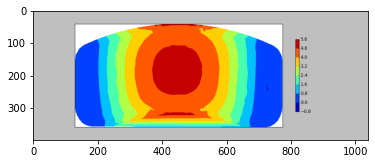

In [8]:
import matplotlib.image as mpimg
img = mpimg.imread('C:/Users/sowjanya2014_2/capstone1/Images/plot1.png')
imgplot = plt.imshow(img)

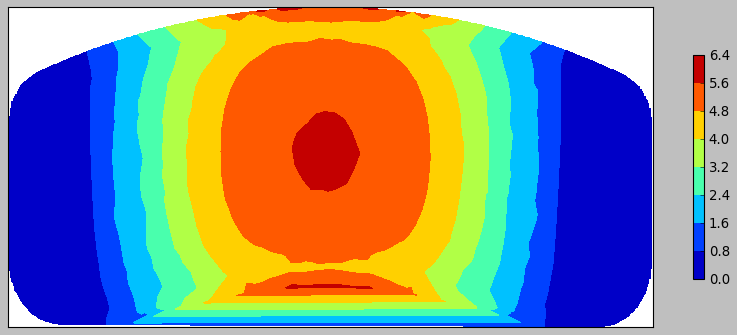

In [9]:
predict(1,100,15,7.5,29.3,86.8,100)

In [16]:
cordinates=pd.DataFrame()
cordinates1=pd.DataFrame()
cordinates2=pd.DataFrame()
cordinates3=pd.DataFrame()
cordinates4=pd.DataFrame()

In [18]:
cordinates02 = pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design2/Node_cordinates_Design2.csv",
                                     header=None)
cordinates02.columns = ['Node_Number', 'X_cord', 'Y_cord']
cordinates21 = pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design2/Node_cordinates_Design2_1.csv",
                          header=None)
cordinates21.columns = ['Node_Number', 'X_cord', 'Y_cord']
cordinates22 = pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design2/Node_cordinates_Design2_2.csv",
                          header=None)
cordinates22.columns = ['Node_Number', 'X_cord', 'Y_cord']
cordinates23 = pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design2/Node_cordinates_Design2_3.csv",
                          header=None)
cordinates23.columns = ['Node_Number', 'X_cord', 'Y_cord']
cordinates24 = pd.read_csv("C:/Users/sowjanya2014_2/capstone1/design2/Node_cordinates_Design2_4.csv",
                          header=None)
cordinates24.columns = ['Node_Number', 'X_cord', 'Y_cord']
#Model2 = pickle.load(open('model2.pkl', 'rb'))
#results = Model2.predict(Inputs)
cordinates=cordinates02
cordinates1=cordinates21
cordinates2=cordinates22
cordinates3=cordinates23
cordinates4=cordinates24


In [19]:
cordinates1

,Node_Number,X_cord,Y_cord
0,88,-124.269421,9.665355
1,89,-122.439883,9.171555
2,90,-120.610344,8.677754
3,91,-118.780805,8.183954
4,92,-116.951266,7.690154
...,...,...,...
202,430,-103.735448,0.791852
203,431,-105.139625,2.201160
204,432,-106.543803,3.610467
205,433,-107.926512,2.205575
